In [ ]:
# Using Google Trend data

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
def parser(s):
    return datetime.strptime(s, '%d-%m-%Y')

In [12]:
ice_cream_heater_df = pd.read_csv('D:/Research Paper Finance/Finance Data/bitvscrypto.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
ice_cream_heater_df

,Bitcoin,Cryptocurrency
Week,,
2016-03-27,2,0.5
2016-04-03,2,0.5
2016-04-10,3,0.5
2016-04-17,2,0.5
2016-04-24,3,0.5
...,...,...
2021-02-21,62,13.0
2021-02-28,42,10.0
2021-03-07,42,11.0


In [13]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [14]:
heater_series = ice_cream_heater_df.Cryptocurrency  # heater = Crypto-currency

In [15]:
heater_series

Week
2016-03-27     0.5
2016-04-03     0.5
2016-04-10     0.5
2016-04-17     0.5
2016-04-24     0.5
              ... 
2021-02-21    13.0
2021-02-28    10.0
2021-03-07    11.0
2021-03-14    13.0
2021-03-21    11.0
Freq: W-SUN, Name: Cryptocurrency, Length: 261, dtype: float64

In [16]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series, color='red')
    plt.ylabel('Search Frequency for "Crypto-currency"', fontsize=16)

    for year in range(2016, 2021):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

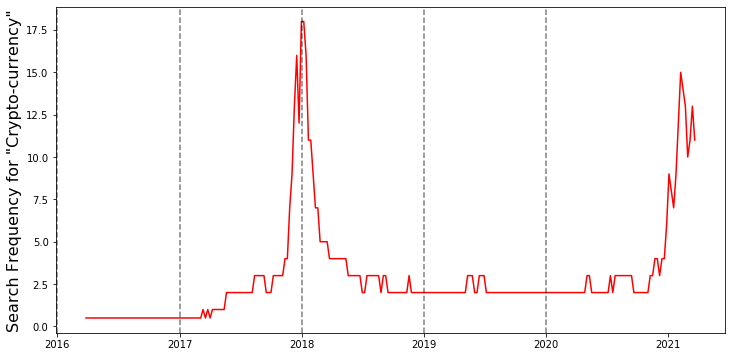

In [17]:
plot_series(heater_series)

### Normalize


In [18]:
avg, dev = heater_series.mean(), heater_series.std()

In [19]:
heater_series = (heater_series - avg) / dev

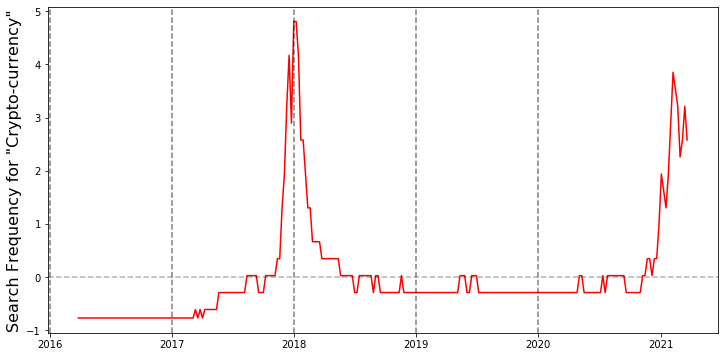

In [20]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

### Take First Difference to Remove Trend

In [21]:
heater_series = heater_series.diff().dropna()

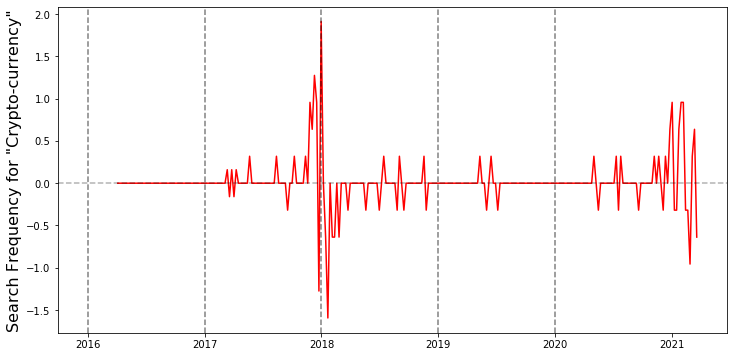

In [22]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

### Remove Increasing Volatility

In [23]:
annual_volatility = heater_series.groupby(heater_series.index.year).std()

In [24]:
annual_volatility

Week
2016    0.000000
2017    0.420430
2018    0.299662
2019    0.089266
2020    0.165155
2021    0.685761
Name: Cryptocurrency, dtype: float64

In [25]:
heater_annual_vol = heater_series.index.map(lambda d: annual_volatility.loc[d.year])

In [26]:
heater_series = heater_series / heater_annual_vol

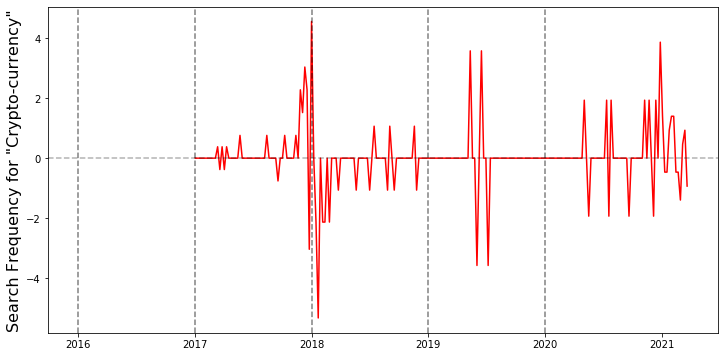

In [27]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

### Remove Seasonality

In [28]:
month_avgs = heater_series.groupby(heater_series.index.month).mean()

In [29]:
month_avgs

Week
1    -0.211678
2    -0.365582
3    -0.010467
4     0.000000
5     0.192069
6     0.000000
7    -0.091153
8    -0.017973
9    -0.149338
10    0.044596
11    0.405438
12    0.642072
dtype: float64

In [30]:
heater_month_avg = heater_series.index.map(lambda d: month_avgs.loc[d.month])

In [31]:
heater_month_avg

Float64Index([                  0.0,                   0.0,
                                0.0,                   0.0,
                0.19206908695676073,   0.19206908695676073,
                0.19206908695676073,   0.19206908695676073,
                0.19206908695676073,                   0.0,
              ...
               -0.21167756272948274,  -0.21167756272948274,
               -0.21167756272948274,  -0.36558179415731196,
               -0.36558179415731196,  -0.36558179415731196,
               -0.36558179415731196, -0.010466947169445443,
              -0.010466947169445443, -0.010466947169445443],
             dtype='float64', name='Week', length=260)

In [32]:
heater_series = heater_series - heater_month_avg

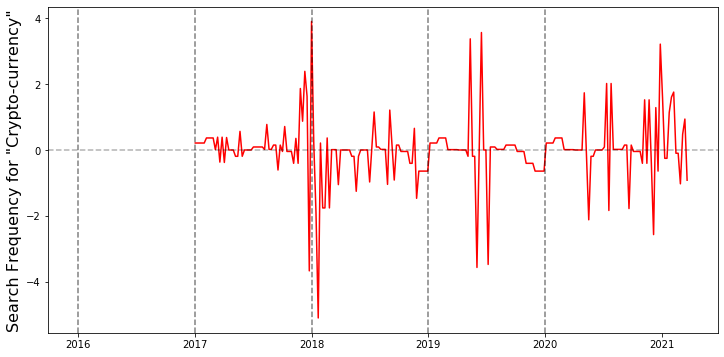

In [33]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

### ACF & PACF


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [63]:
# Bitcoin Prices data
#read data
df_ice_cream = pd.read_csv('D:/Research Paper Finance/Finance Data/Crypto/bitcoin.csv')
df_ice_cream.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
1,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
3,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
4,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275


In [64]:
# Droping columns
df_ice_cream.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)



In [65]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'Adj Close':'AdjClose'}, inplace=True)

In [66]:
#df_ice_cream

In [67]:
#set date as index
df_ice_cream.set_index('Date', inplace=True)

In [70]:
df_ice_cream.head()

,AdjClose
Date,
2019-12-31,7193.599121
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738


### Doing the same thing with yfinace directly

In [73]:
import yfinance as yf

In [77]:
#DEfine the ticker symbol
tickerSymbol = 'BTC-USD'

In [78]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [79]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2021-9-3')

In [80]:
tickerDf = tickerDf[['Close']]

In [81]:
#see your data
tickerDf.head()

,Close
Date,
2019-12-31,7193.599121
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738


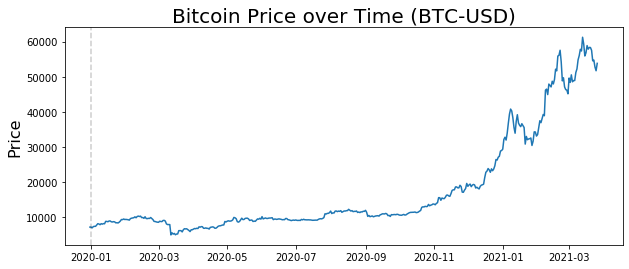

In [82]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Bitcoin Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2020,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

### Stationarity: take first difference of this series

In [83]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [84]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [85]:
tickerDf.head()

,Close,FirstDifference
Date,,
2019-12-31,7193.599121,6.575195
2020-01-01,7200.174316,-214.704102
2020-01-02,6985.470215,359.414062
2020-01-03,7344.884277,65.772461
2020-01-04,7410.656738,0.660645


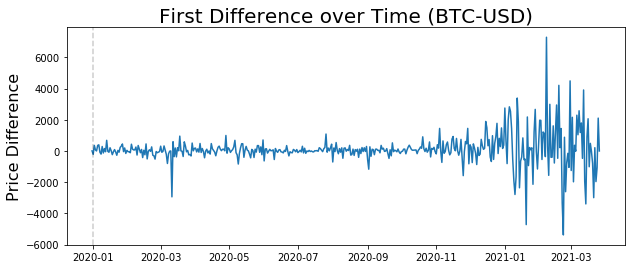

In [86]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2020,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

## ACF

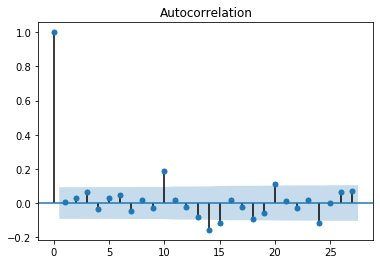

In [87]:
acf_plot = plot_acf(tickerDf.FirstDifference)

### PACF

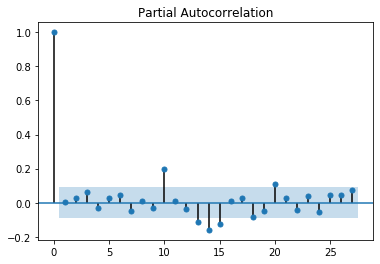

In [88]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

In [89]:
df_ice_cream.head()

,AdjClose
Date,
2019-12-31,7193.599121
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738


### Based on PACF we start with AR model with lags 1 & 10 # Not completed start with AR model

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

In [93]:

# Get training and testing sets
train_end = datetime(2020,10,30)
test_end = datetime(2021,3,8)

train_data = tickerDf[:train_end]
test_data = tickerDf[train_end + timedelta(days=1):test_end]

### Fit the AR Model

In [102]:

#infer the frequency of the data
catfish_sales = tickerDf.asfreq(pd.infer_freq(tickerDf.index))

In [104]:
start_date = pd.to_datetime('2020-01-01')
production_ice_cream = tickerDf[start_date:]

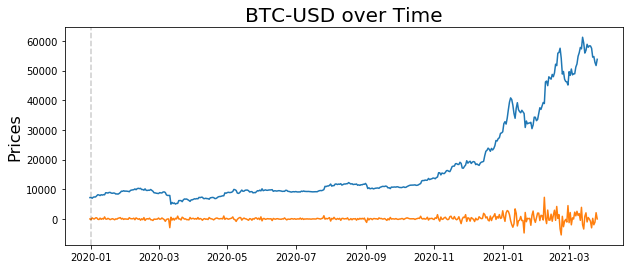

In [106]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf)
plt.title('BTC-USD over Time', fontsize=20)
plt.ylabel('Prices', fontsize=16)
for year in range(2020, 2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)